In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

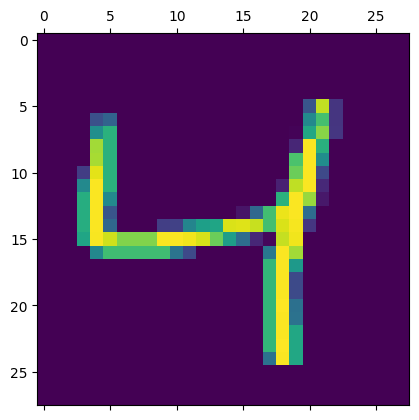

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
# input 28*28 = 784, output 10  
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4701 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9250


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 929us/step - loss: 0.2688 - accuracy: 0.9252


[0.26880335807800293, 0.9251999855041504]

In [27]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 698us/step


In [34]:
y_predicted[9]

array([1.3213670e-04, 1.0813280e-07, 7.8159028e-06, 6.8508903e-04,
       8.3367759e-01, 3.3762788e-03, 3.4733286e-05, 9.4636810e-01,
       4.6276796e-01, 9.9671489e-01], dtype=float32)

In [35]:
y_test[9]

9

In [37]:
np.argmax(y_predicted[9])

9

In [42]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [74]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    1,    0,    1,    1,    0,    1,    1,    0],
       [   0, 1132,    0,    1,    0,    1,    0,    0,    1,    0],
       [   1,    5, 1008,    5,    2,    0,    0,    4,    7,    0],
       [   0,    1,    1,  986,    0,    6,    0,    4,    8,    4],
       [   0,    0,    1,    0,  960,    0,    4,    5,    0,   12],
       [   2,    1,    0,    8,    1,  876,    1,    1,    2,    0],
       [   2,    3,    2,    0,    5,    3,  943,    0,    0,    0],
       [   1,    4,    5,    1,    0,    1,    0, 1007,    4,    5],
       [   2,    3,    4,    1,    2,    5,    0,    3,  948,    6],
       [   2,    2,    0,    0,    6,    4,    1,    5,    1,  988]],
      dtype=int32)>

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(95.72222222222221, 0.5, 'Truth')

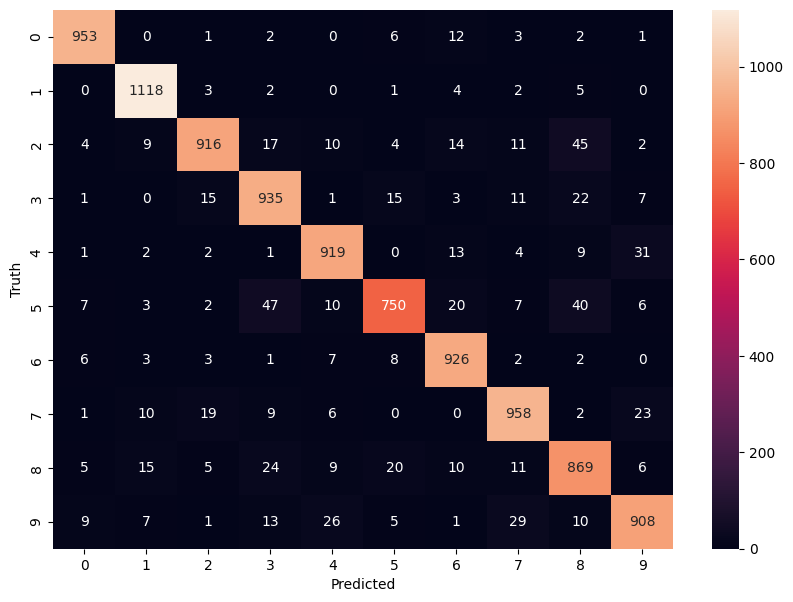

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layer

In [70]:
# use keras flatten layer instead of suppling flatened input
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    keras.layers.Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    keras.layers.Dense(80, activation='relu'),  # third hidden layer with 80 neurons
    keras.layers.Dense(40, activation='relu'),  # third hidden layer with 40 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2212 - accuracy: 0.9336
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0971 - accuracy: 0.9703
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9789
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9834
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9899
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [71]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1383 - accuracy: 0.9822


[0.13830554485321045, 0.982200026512146]

In [72]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

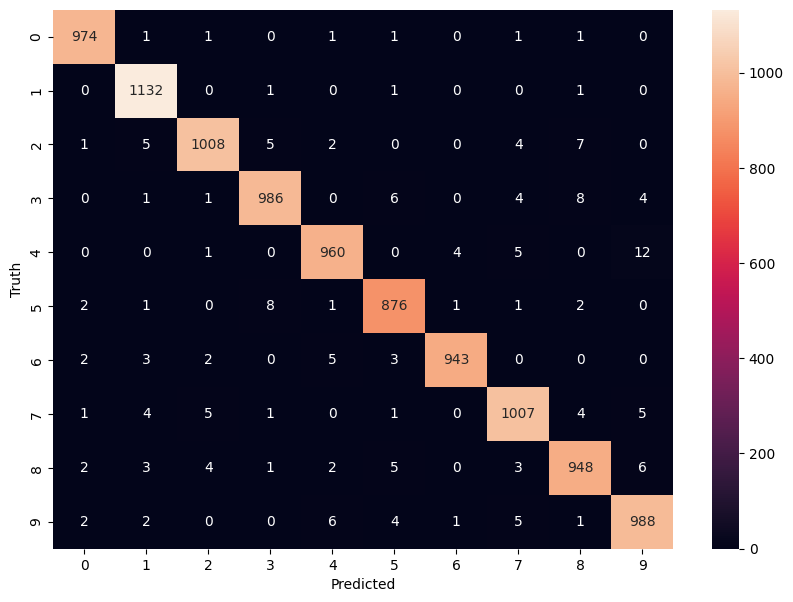

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')